In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0,0.5,'Magnitud')

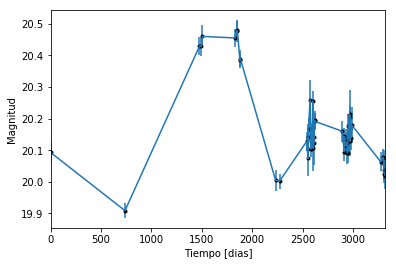

In [2]:
data = np.genfromtxt('LC_R_49159.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

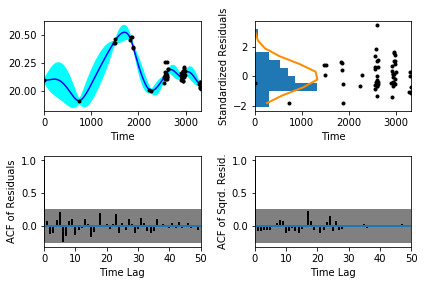

In [5]:
sample.assess_fit()

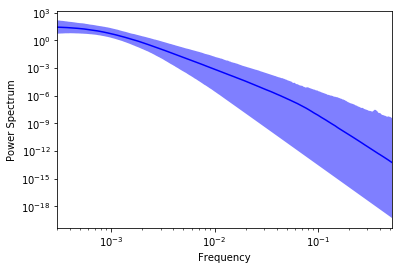

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

NameError: name 'noise_level' is not defined

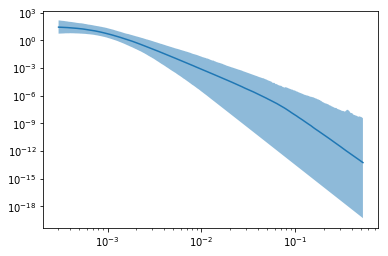

In [7]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia')
plt.xlabel('Frecuencia  [1 / dia]')
plt.annotate("Nivel de ruido", (1.25* plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

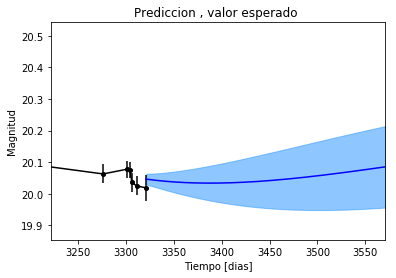

In [8]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

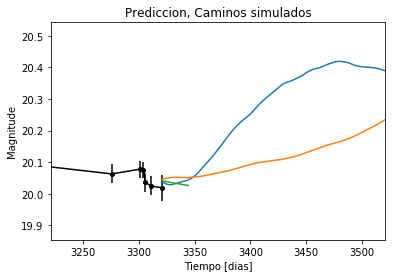

In [9]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 3
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


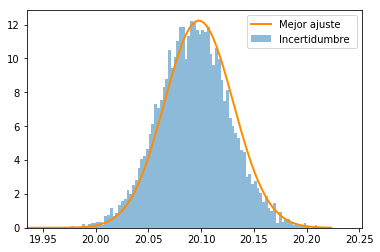

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

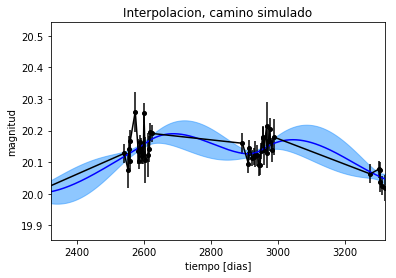

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

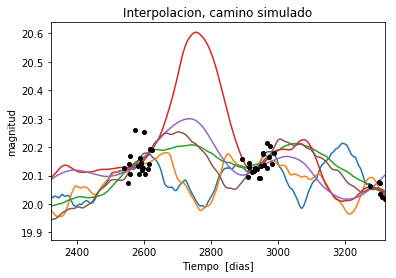

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 6
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [15]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 337.553089361
Median: 0.000664804861198
Standard deviation: 0.211362399485
68% credibility interval: [ 0.          0.23471373]
95% credibility interval: [ 0.          0.78622784]
99% credibility interval: [ 0.          0.97774147]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 337.553089361
Median: 0.000664804861198
Standard deviation: 0.211362399485
68% credibility interval: [ 0.          0.23471373]
95% credibility interval: [ 0.          0.78622784]
99% credibility interval: [ 0.          0.97774147]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 3652.27128546
Median: 0.0
Standard deviation: 0.000323508431637
68

Plotting parameter summary


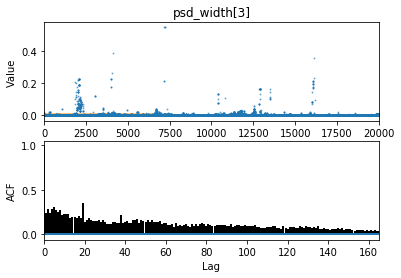

In [16]:
sample.plot_parameter('psd_width', 3, doShow=True)

In [17]:

centroid_samples = sample.get_samples('logpost')
centroid_samples.shape

(20000, 1)

In [18]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1402.87769796
Median: 116.434301862
Standard deviation: 1.6483903134
68% credibility interval: [ 114.67456534  117.63428192]
95% credibility interval: [ 112.00377831  118.50864804]
99% credibility interval: [ 109.80228355  118.81870924]


In [19]:
centroid_samples = sample.get_samples('ar_coefs')
centroid_samples.shape

(20000, 5)

In [20]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 343.30818397
Median: 0.335459614234
Standard deviation: 1.84568218808
68% credibility interval: [ 0.03071564  2.76572201]
95% credibility interval: [ 0.01122493  6.40494466]
99% credibility interval: [  8.86418082e-03   8.96591022e+00]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 355.536380964
Median: 0.132475220424
Standard deviation: 6.86409979829
68% credibility interval: [  2.81279922e-03   4.26851853e+00]
95% credibility interva

In [21]:
centroid_samples = sample.get_samples('ma_coefs')
centroid_samples.shape

(20000, 2)

In [22]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 593.777721077
Median: 1.75319557765e-39
Standard deviation: 1.44294991767e+99
68% credibility interval: [  2.86028924e-68   1.13405381e-06]
95% credibility interval: [  2.77014470e-148   1.23414246e+081]
99% credibility interval: [  9.74425811e-167   3.03214376e+084]


In [23]:
centroid_samples = sample.get_samples('mu')
centroid_samples.shape

(20000, 1)

In [24]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2805.98284328
Median: 20.1312463231
Standard deviation: 0.126770252979
68% credibility interval: [ 20.02221745  20.22241397]
95% credibility interval: [ 19.85006257  20.36112044]
99% credibility interval: [ 19.67600293  20.52654463]


In [25]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [26]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 337.553089361
Median: 0.000664804861198
Standard deviation: 0.211362399485
68% credibility interval: [ 0.          0.23471373]
95% credibility interval: [ 0.          0.78622784]
99% credibility interval: [ 0.          0.97774147]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 337.553089361
Median: 0.000664804861198
Standard deviation: 0.211362399485
68% credibility interval: [ 0.          0.23471373]
95% credibility interval: [ 0.          0.78622784]
99% credibility interval: [ 0.          0.97774147]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 3652.27128546
Median: 0.0
Standard deviation: 0.000323508431637
68

In [27]:
centroid_samples = sample.get_samples('loglik')
centroid_samples.shape

(20000, 1)

In [28]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1402.87769796
Median: 116.434301862
Standard deviation: 1.6483903134
68% credibility interval: [ 114.67456534  117.63428192]
95% credibility interval: [ 112.00377831  118.50864804]
99% credibility interval: [ 109.80228355  118.81870924]


In [29]:
centroid_samples = sample.get_samples('psd_width')
centroid_samples.shape

(20000, 4)

In [30]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 991.91147488
Median: 0.00692376600214
Standard deviation: 0.18086570514
68% credibility interval: [ 0.00058966  0.14523071]
95% credibility interval: [  3.26251515e-04   7.14356694e-01]
99% credibility interval: [  3.06303934e-04   9.77808731e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 739.303937552
Median: 0.000968492109682
Standard deviation: 0.056214281239
68% credibility interval: [ 0.00040064  0.01258451]
95% credibility interval: [ 0.00031376  0.15050785]
99% credibility interval: [  3.03809547e-04   4.12447505e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 770.783243764
Median: 0.00396630095344
Standard 

In [31]:
centroid_samples = sample.get_samples('var')
centroid_samples.shape

(20000, 1)

In [32]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2413.65429686
Median: 0.0469611770029
Standard deviation: 0.0657691122324
68% credibility interval: [ 0.02580089  0.09565765]
95% credibility interval: [ 0.01656492  0.20998321]
99% credibility interval: [ 0.01254769  0.3827357 ]


In [33]:
centroid_samples = sample.get_samples('measerr_scale')
centroid_samples.shape

(20000, 1)

In [34]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2637.89737655
Median: 0.999294977386
Standard deviation: 0.154332654632
68% credibility interval: [ 0.86433229  1.16432899]
95% credibility interval: [ 0.75707518  1.36435414]
99% credibility interval: [ 0.70045229  1.51814686]


In [35]:
centroid_samples = sample.get_samples('sigma')
centroid_samples.shape

(20000, 1)

In [36]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1554.11935634
Median: 1.713249083e-05
Standard deviation: 0.0052023584972
68% credibility interval: [  1.72091126e-07   5.86274928e-04]
95% credibility interval: [  1.62891121e-86   3.97786213e-03]
99% credibility interval: [  4.17222602e-90   1.14363772e-02]


In [37]:
centroid_samples = sample.get_samples('ar_roots')
centroid_samples.shape

(20000, 4)

In [38]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 991.91147488
Median: (-0.043503304815-0.0196403641048j)
Standard deviation: 1.74788308234
68% credibility interval: [-0.91251146-1.14398809j -0.00370497-0.06532719j]
95% credibility interval: [ -4.48843548e+00+0.j          -2.04989872e-03-0.00057393j]
99% credibility interval: [ -6.14375345e+00+0.j          -1.92456438e-03-0.00235319j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 739.303937552
Median: (-0.00608521539368+0.155750788304j)
Standard deviation: 1.37419610824
68% credibility interval: [-0.07907080+3.0948359j  -0.00251728+0.00589566j]
95% credibility interval: [-0.94566869+3.25793068j -0.00197144+0.00466859j]
99% credibility interval: [ -2.59148410e+00+6.33125407j  -1.90889168e-03+0.j        ]
Posterior su

Plotting 2d PDF w KDE


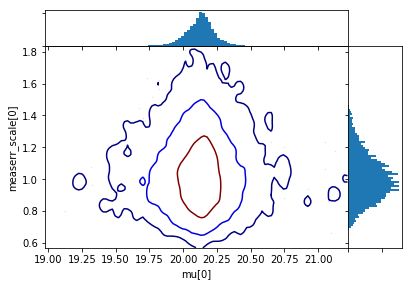

In [39]:
sample.plot_2dkde('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


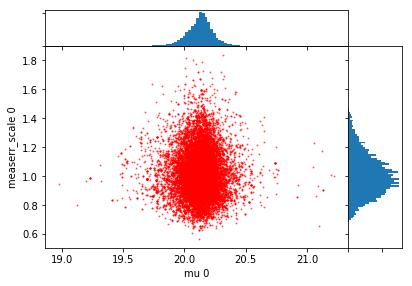

In [40]:
sample.plot_2dpdf('mu', 'measerr_scale', doShow=True)